- The Python package 'mlxtend' contains the implementation of the FP-growth algorithm

In [1]:
#pip install mlxtend

In [2]:
import pandas as pd                                   # For dataframes
import matplotlib.pyplot as plt                       # For plotting data
from mlxtend.preprocessing import TransactionEncoder  # For FP-tree algorithm
from mlxtend.frequent_patterns import fpgrowth        # For FP-tree algorithm
import warnings
warnings.filterwarnings('ignore')

- We are using the dataset from library arules in R. Libray rpy2 provides an interface to R programming

In [3]:
#pip install rpy2

In [4]:
# enables the %%R magic
%load_ext rpy2.ipython

- We can run the R code in the cell below

In [5]:
%%R

library(arules)
data(Groceries) # Groceries object in arules
write(Groceries, file = "Groceries.csv", format="basket", sep = ",") # saving as a csv file

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: 'arules'


R[write to console]: The following objects are masked from 'package:base':

    abbreviate, write




In [6]:
transactions = []

with open('./Groceries.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)
    
transactions[:3]

[['"citrus fruit"', '"semi-finished bread"', '"margarine"', '"ready soups"'],
 ['"tropical fruit"', '"yogurt"', '"coffee"'],
 ['"whole milk"']]

- Create a wide dataframe where each column corresponds to a single good.

In [7]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

df.head()

,"""Instant food products""","""UHT-milk""","""abrasive cleaner""","""artif. sweetener""","""baby cosmetics""","""baby food""","""bags""","""baking powder""","""bathroom cleaner""","""beef""",...,"""turkey""","""vinegar""","""waffles""","""whipped/sour cream""","""whisky""","""white bread""","""white wine""","""whole milk""","""yogurt""","""zwieback"""
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


- Call 'fpgrowth()' on 'transactions' 
- 'fpgrowth()' takes the minimum support ratio and minimum confidence. 

In [8]:
rules_df = fpgrowth(df, min_support=0.01, use_colnames=True, max_len=2, verbose=False)

rules_df = rules_df[rules_df.itemsets.map(len) == 2]
rules_df['From'] = rules_df['itemsets'].map(lambda x: list(x)[0])
rules_df['To'] = rules_df['itemsets'].map(lambda x: list(x)[1])
rules_df['N'] = (rules_df['support'] * len(transactions)).astype(int)

rules_df.sort_values('N', ascending=False, inplace=True)

rules_df.head()

,support,itemsets,From,To,N
132,0.074835,"(""whole milk"", ""other vegetables"")","""whole milk""","""other vegetables""",736
142,0.056634,"(""rolls/buns"", ""whole milk"")","""rolls/buns""","""whole milk""",557
104,0.056024,"(""yogurt"", ""whole milk"")","""yogurt""","""whole milk""",551
219,0.048907,"(""root vegetables"", ""whole milk"")","""root vegetables""","""whole milk""",481
217,0.047382,"(""root vegetables"", ""other vegetables"")","""root vegetables""","""other vegetables""",466


- Show rules with decreasing support

In [9]:
# Pick top rules
rules_df = rules_df.sort_values('N', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Create a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Map the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20)

,support,itemsets,From,To,N,FromN,ToN
132,0.074835,"(""whole milk"", ""other vegetables"")","""whole milk""","""other vegetables""",736,13,10
142,0.056634,"(""rolls/buns"", ""whole milk"")","""rolls/buns""","""whole milk""",557,1,13
104,0.056024,"(""yogurt"", ""whole milk"")","""yogurt""","""whole milk""",551,8,13
219,0.048907,"(""root vegetables"", ""whole milk"")","""root vegetables""","""whole milk""",481,5,13
217,0.047382,"(""root vegetables"", ""other vegetables"")","""root vegetables""","""other vegetables""",466,5,10
107,0.043416,"(""yogurt"", ""other vegetables"")","""yogurt""","""other vegetables""",427,8,10
141,0.042603,"(""rolls/buns"", ""other vegetables"")","""rolls/buns""","""other vegetables""",419,1,10
111,0.042298,"(""tropical fruit"", ""whole milk"")","""tropical fruit""","""whole milk""",416,11,13
173,0.040061,"(""soda"", ""whole milk"")","""soda""","""whole milk""",394,7,13
172,0.038332,"(""soda"", ""rolls/buns"")","""soda""","""rolls/buns""",377,7,1


- Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 10 (support*10).

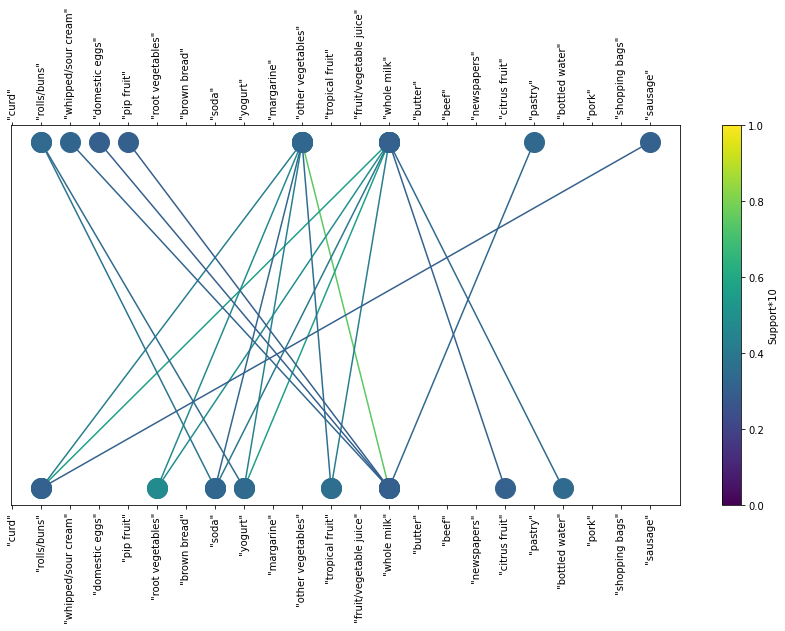

In [10]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['support'] * 10),
             markersize=20)

# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()